## Ejemplo 1

Si X es una VA exponencial.

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

$ X \sim Exp(\lambda = 0.25) $

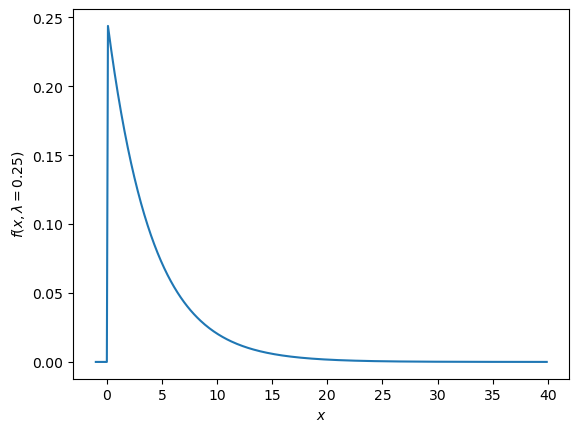

In [2]:
l = 0.25 # lambda
beta = 1/l # Beta = 1/lambda
X = stats.expon(scale = beta)

# VA -> X:Tiempo de atencion .

x = np.arange(-1,40,0.1)

# FDP - Funcion de densidad de probabilidad (f(x))
pdf = X.pdf(x)
plt.plot(x, pdf)
plt.xlabel('$x$')
plt.ylabel('$f(x,\lambda = 0.25)$')
plt.show()


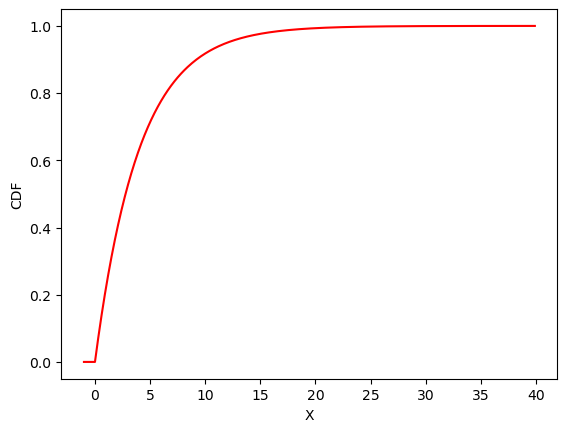

In [3]:
# CDF - Funcion de distribucion acumulativa (F(x))
plt.figure()
cdf = X.cdf(x)
plt.plot(x, cdf, color = 'r')
plt.xlabel('X')
plt.ylabel('CDF')
plt.show()


**Pregunta**: Halle la probabilidad de que un empleado pase de cuatro a cinco minutos con un cliente seleccionado al azar


$$P(4<X<5) = P(X<5) - P(X<4) = P(X \leq 5) - P(X \leq 4) $$

$$P(4<X<5)  = F(X=5) - F(X = 4)$$

In [13]:
P1 = X.cdf(5) - X.cdf(4)  # P(4 < X < 5) = F(5) - F(4)
print("P(4 < X < 5) =", P1)

P(4 < X < 5) = 0.08137464431125219


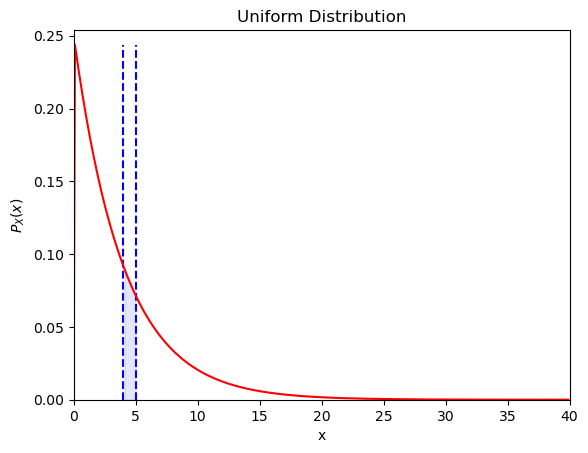

In [5]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 40)
ax.set_ylim(0, max(pdf) + 0.01)
# Limites
x_4 = plt.vlines(x = 4, ymin = 0,ymax = max(pdf), color = 'b', linestyles='--')
x_5 = plt.vlines(x = 5, ymin = 0,ymax = max(pdf), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf,color='r')
ax.fill_between(x, pdf,0, where=(x>=4) & (x<=5), color='blue', alpha=.1)

plt.show()

## Ejemplo 2

En promedio, una determinada pieza de computadora dura diez años. El tiempo que dura la parte de la computadora se distribuye exponencialmente.
1. ¿Cuál es la probabilidad de que una pieza de computadora dure más de 7 años?
2. En promedio, ¿cuánto tiempo durarían cinco piezas de computadora si se utilizan una tras otra?
3. El ochenta por ciento de las piezas de las computadoras duran como máximo ¿cuánto tiempo?
4. ¿Cuál es la probabilidad de que una pieza de computadora dure entre nueve y 11 años?


Sea $Y = \text{Tiempo\;de\;duración\;de\;la\;pieza\;de\;computadora}$ de acuerdo al problema $Y \sim Exp(\lambda)$ donde podemos tener en cuenta que al darnos la media $\mu = 10$ podemos hallar $\lambda$ de la siguiente manera:

$$\mu = \frac{1}{\lambda} \to \lambda = \frac{1}{\mu} = \frac{1}{10} = 0.1$$

$$\lambda = \frac{1}{\beta} \to \beta = \frac{1}{\lambda} = \frac{1}{0.1} = 10$$

De modo que tendremos que $Y \sim Exp(\lambda = 0.1)$ o en terminos del parametro $\beta$ tenemos: $Y \sim Exp(\beta = 10)$

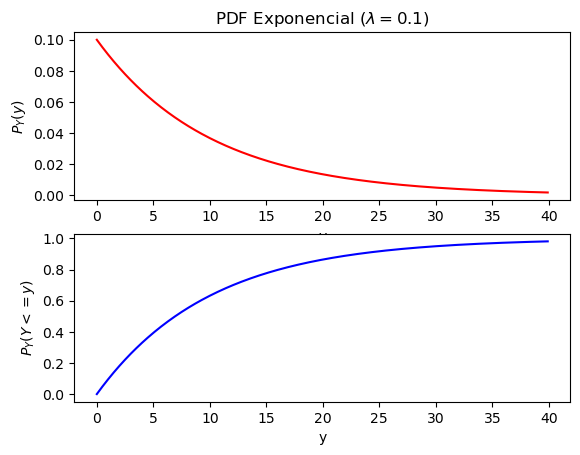

In [6]:
l = 0.1 # lambda
Y = stats.expon(scale = 1/l)

# VA -> Y: Tiempo de duración de la pieza de computadora

y = np.arange(0,40,0.1)

# FDP - Funcion de densidad de probabilidad (f(y))
pdf_y = Y.pdf(y)

# CDF - Funcion de densidad de acumulativa (F(y))
cdf_y = Y.cdf(y)

# Plot 1: FDP
plt.subplot(2, 1, 1)
plt.title('PDF Exponencial ($\lambda = 0.1$)')
plt.ylabel('$P_Y(y)$')
plt.xlabel('y')
plt.plot(y, pdf_y,color='r')

#Plot 2: CDF
plt.subplot(2, 1, 2)
plt.ylabel('$P_Y(Y<=y)$')
plt.xlabel('y')
plt.plot(y, cdf_y,color='b')
plt.show()


**Solución punto 1**

Nos piden: $P(Y>7)$ lo cual es:

$$P(Y > 7) = 1 - P(Y \leq 7) = 1 - F(Y = 7)$$

In [9]:
P_7 = 1 - Y.cdf(x = 7)
print("P(Y > 7) = {0:.4f}".format(P_7))

P(Y > 7) = 0.4966


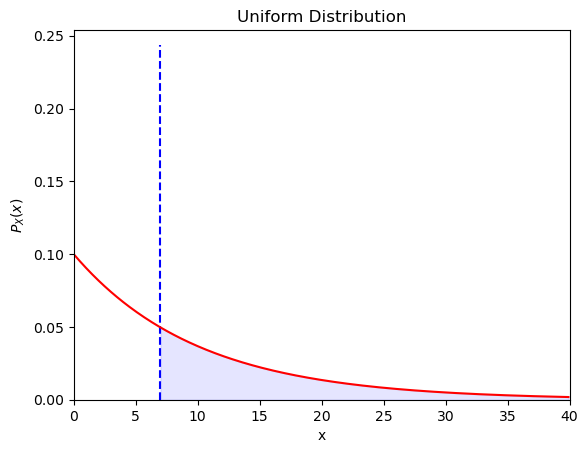

In [13]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 40)
ax.set_ylim(0, max(pdf) + 0.01)
# Limites
y_7 = plt.vlines(x = 7, ymin = 0,ymax = max(pdf), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(y, pdf_y,color='r')
ax.fill_between(y, pdf_y,0, where=(y>=7), color='blue', alpha=.1)

plt.show()

**Solución punto 2**

En promedio, una pieza de computadora dura diez años ($\mu=10$). Por lo tanto, cinco piezas de computadora, si se utilizan una tras otra, durarían, en promedio:

$$5 \cdot \mu = 5 \cdot 10 = 50\;\text{años}$$

**Solución punto 3**

Se pide $𝑃(T < k)=0.8$


In [22]:
P = 0.8
diff_cdf_y = np.absolute(cdf_y - P)
index_P = np.where(diff_cdf_y == min(diff_cdf_y))
index_P 


[8.00000000e-01 7.90049834e-01 7.80198673e-01 7.70445534e-01
 7.60789439e-01 7.51229425e-01 7.41764534e-01 7.32393820e-01
 7.23116346e-01 7.13931185e-01 7.04837418e-01 6.95834135e-01
 6.86920437e-01 6.78095431e-01 6.69358235e-01 6.60707976e-01
 6.52143789e-01 6.43664817e-01 6.35270211e-01 6.26959134e-01
 6.18730753e-01 6.10584246e-01 6.02518798e-01 5.94533603e-01
 5.86627861e-01 5.78800783e-01 5.71051586e-01 5.63379494e-01
 5.55783741e-01 5.48263568e-01 5.40818221e-01 5.33446956e-01
 5.26149037e-01 5.18923733e-01 5.11770323e-01 5.04688090e-01
 4.97676326e-01 4.90734331e-01 4.83861409e-01 4.77056874e-01
 4.70320046e-01 4.63650250e-01 4.57046820e-01 4.50509095e-01
 4.44036421e-01 4.37628152e-01 4.31283646e-01 4.25002268e-01
 4.18783392e-01 4.12626394e-01 4.06530660e-01 4.00495579e-01
 3.94520548e-01 3.88604970e-01 3.82748252e-01 3.76949810e-01
 3.71209064e-01 3.65525439e-01 3.59898367e-01 3.54327285e-01
 3.48811636e-01 3.43350869e-01 3.37944438e-01 3.32591801e-01
 3.27292424e-01 3.220457